## Load + Clean the Dataset in Python

In [27]:
import pandas as pd

### Load dataset

In [28]:
df = pd.read_csv('/content/mental_health_survey.csv')

### Preview

In [29]:
df.head()

,gender,age,course,year,cgpa,marital_status?,depression?,anxiety?,panic_attack?,sought_treatment?,num_conditions,cgpa_bracket
0,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0,2,High
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0,1,High
2,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0,3,High
3,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0,1,High
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0,0,High


### Drop timestamp (not useful)

In [30]:
df = df.drop('Timestamp', axis=1)
df.head()

KeyError: "['Timestamp'] not found in axis"

### Clean column names

In [ ]:

df.columns = [col.strip().lower().replace(' ','_') for col in df.columns]
df = df.rename(columns={
    'choose_your_gender': 'gender',
    'age': 'age',
    'what_is_your_course?': 'course',
    'your_current_year_of_study': 'year',
    'what_is_your_cgpa?': 'cgpa',
    'marital_status': 'marital_status?',
    'do_you_have_depression?': 'depression?',
    'do_you_have_anxiety?': 'anxiety?',
    'do_you_have_panic_attack?': 'panic_attack?',
    'did_you_seek_any_specialist_for_a_treatment?': 'sought_treatment?'
})
df.columns.tolist()
df.head()

### Convert Yes/No columns to 1/0

In [ ]:
yes_no_cols = ['marital_status?','depression?', 'anxiety?', 'panic_attack?','sought_treatment?' ]
for col in yes_no_cols:
  df[col] = df[col].map({'Yes': 1, 'No': 0})
df.head()

## Create New columns

### Mental Health Score (0-3)

In [ ]:
df['num_conditions'] = df[['depression?', 'anxiety?', 'panic_attack?']].sum(axis=1)
df.head()

### CGPA Bracket

#### View unique CGPA ranges

In [ ]:
print(df['cgpa'].unique())

In [ ]:
# step 1: strip spaces from cgpa values
df['cgpa'] = df['cgpa'].str.strip()
print(df['cgpa'].unique())

In [ ]:
# Step 2: Create mapping dictionary
cgpa_map = {
    '3.50 - 4.00': 'Very_High',
    '3.00 - 3.49': 'High',
    '2.50 - 2.99': 'Mid',
    '2.00 - 2.49': 'Low',
    '0 - 1.99': 'Very Low'
}
cgpa_order = ['Very High', 'High', 'Mid', 'Low', 'Very Low']

# Step 3: Map to new bracket column
df['cgpa_bracket'] = df['cgpa'].map(cgpa_map).fillna('Unknown')
df.head(100)

In [ ]:
# step 4: Preview counts
print(df['cgpa_bracket'].value_counts())

# Explore the Data (EDA)

### Num_conditions by CGPA Bracket

<Axes: title={'center': 'Average Number of Reported Mental Health Conditions by CGPA Bracket'}, xlabel='CGPA Bracket', ylabel='Avg Count (0-3)'>

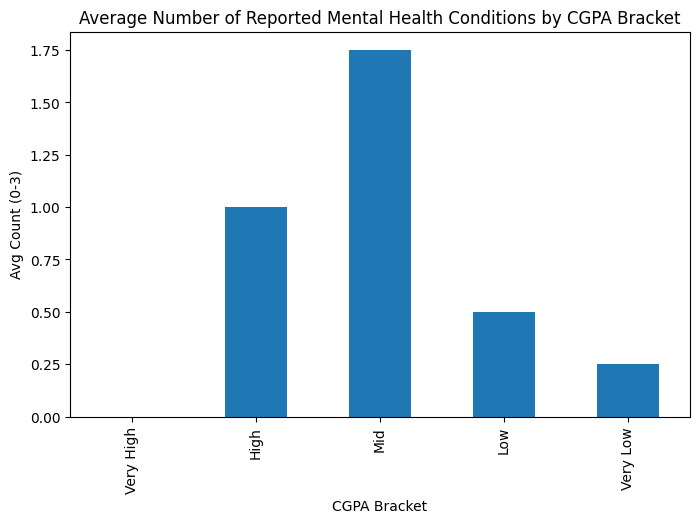

In [32]:
df.groupby('cgpa_bracket')['num_conditions'].mean().reindex(cgpa_order).plot(
    kind = 'bar',
    title='Average Number of Reported Mental Health Conditions by CGPA Bracket',
    ylabel = 'Avg Count (0-3)',
    xlabel = 'CGPA Bracket',
    figsize = (8,5)
)


### % of Students Sho Sought Treatment

<Axes: title={'center': 'Percentage of Students Who Sought Treatment'}>

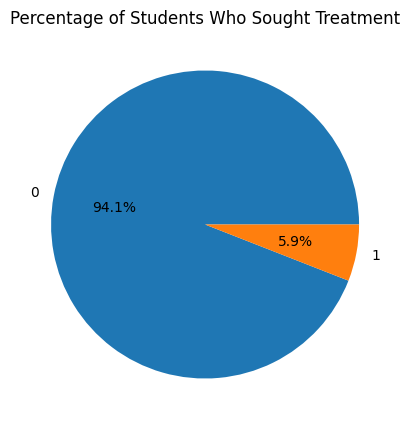

In [31]:
df['sought_treatment?'].value_counts(normalize=True).plot(
    kind = 'pie',
    autopct = '%1.1f%%',
    title = 'Percentage of Students Who Sought Treatment',
    ylabel = '',
    figsize = (8,5)
)

# Export the Cleaned Data

In [ ]:
df.to_csv('/content/cleaned_mental_health_data.csv', index=False)


In [ ]:
from google.colab import files
files.download('/content/cleaned_mental_health_data.csv')